In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [2]:
data = pd.read_csv('/content/traffic_congestion.csv')
data.head()

,sensor_count,avg_speed,time_of_day,congestion_level
0,4,21.723781,morning,medium
1,17,17.319749,morning,low
2,3,54.550117,night,high
3,13,59.453301,night,high
4,9,12.211030,evening,medium


In [6]:
# Handle missing values (if any)
data.dropna(inplace=True)

# Convert time of day to cyclical
# Create a dictionary mapping time_of_day strings to numerical hours
time_mapping = {
    'morning': 9,  # Assuming morning is around 9 am
    'midday': 12,  # Assuming midday is around 12 pm
    'afternoon': 15,  # Assuming afternoon is around 3 pm
    'evening': 18,  # Assuming evening is around 6 pm
    'night': 21   # Assuming night is around 9 pm
}
# Apply this mapping to the time_of_day column to create a new 'hour' column
data['hour'] = data['time_of_day'].map(time_mapping)

# Now you can proceed with cyclical feature engineering
data['hour_sin'] = np.sin(2 * np.pi * data['hour']/24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour']/24)

# Drop unused columns
data.drop(['time_of_day', 'hour'], axis=1, inplace=True)

# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['congestion_level'] = le.fit_transform(data['congestion_level'])

In [7]:
X = data.drop('congestion_level', axis=1)
y = data['congestion_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

        high       0.20      0.25      0.22         4
         low       0.29      0.29      0.29         7
      medium       0.38      0.33      0.35         9

    accuracy                           0.30        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.31      0.30      0.30        20



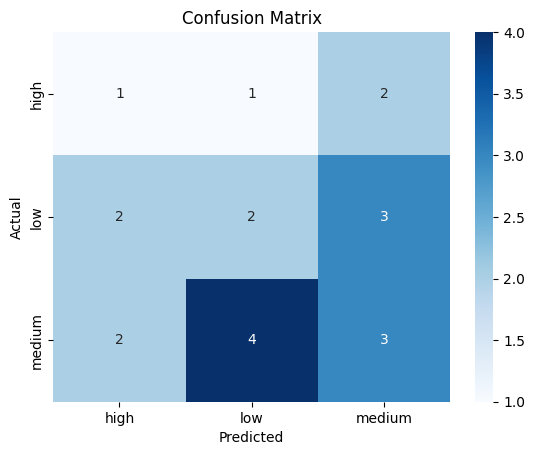

In [9]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
